<a href="https://colab.research.google.com/github/silvesttrnovikov-crypto/Homework_/blob/main/untitl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нomework_1

In [ ]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2025-10-06 12:34:31--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.007s  

2025-10-06 12:34:31 (8.02 MB/s) - ‘train.csv’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/13z3_8i59guazSnsF2Nvc6BuJH6B0rswE8WjyUcnYKNs/edit#gid=0


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('InteractiveSheet_2025-10-06_12_37_36.xlsx', sheet_name='Лист1')
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


2

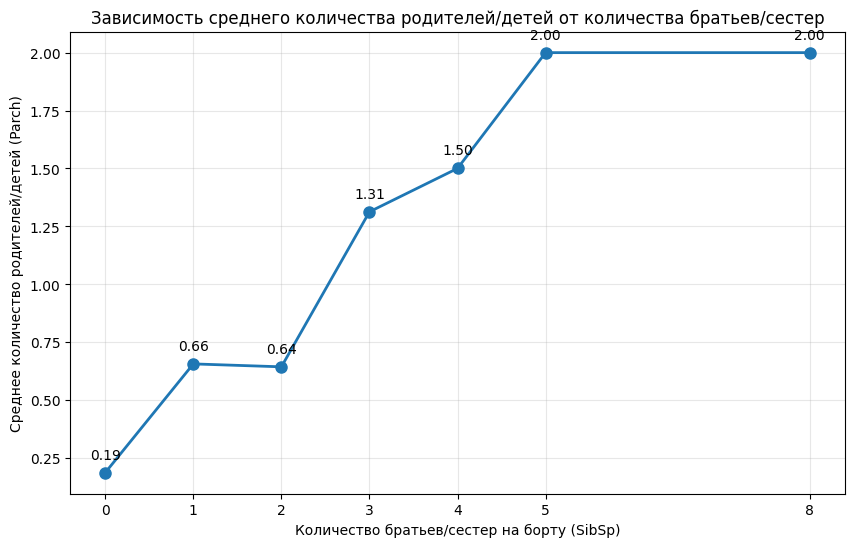

SibSp
0    0.185855
1    0.655502
2    0.642857
3    1.312500
4    1.500000
5    2.000000
8    2.000000
Name: Parch, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
parch_by_sibsp = df.groupby('SibSp')['Parch'].mean()
plt.figure(figsize=(10, 6))
plt.plot(parch_by_sibsp.index, parch_by_sibsp.values, marker='o', linewidth=2, markersize=8)
plt.xlabel('Количество братьев/сестер на борту (SibSp)')
plt.ylabel('Среднее количество родителей/детей (Parch)')
plt.title('Зависимость среднего количества родителей/детей от количества братьев/сестер')
plt.grid(True, alpha=0.3)
plt.xticks(parch_by_sibsp.index)
for i, (x, y) in enumerate(zip(parch_by_sibsp.index, parch_by_sibsp.values)):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()
print("Среднее количество родителей/детей по количеству братьев/сестер:")
print(parch_by_sibsp)

3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Fare", "Sex", "Pclass"]].copy()
    features["Fare"] /= features["Fare"].mean()
    features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
    features['Pclass'] = 4 - features['Pclass']
    return features

model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance'
)

data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.8


4

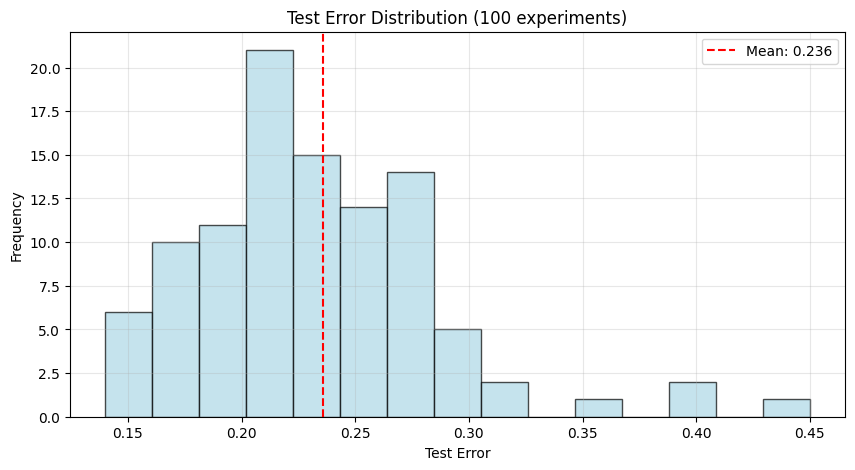

Mean error: 0.236
Std: 0.052
Min error: 0.140
Max error: 0.450


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Функция из предыдущей задачи
def feature_selection_and_preprocessing(dataset):
    features = dataset[["Fare", "Sex", "Pclass"]].copy()
    features["Fare"] /= features["Fare"].mean()
    features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
    features['Pclass'] = 4 - features['Pclass']
    return features

# Загружаем данные
data = pd.read_csv("train.csv", index_col='PassengerId')

# Проводим эксперименты с разными разбиениями
errors = []
n_experiments = 100

for i in range(n_experiments):
    # Случайное разбиение на train/test
    data_train, data_test = train_test_split(data, test_size=100, random_state=i)

    # Создаем и обучаем модель
    model = KNeighborsClassifier(n_neighbors=5, weights='distance')

    model.fit(
        feature_selection_and_preprocessing(data_train.drop('Survived', axis=1)),
        data_train['Survived']
    )

    # Предсказания и оценка точности
    test_predictions = model.predict(
        feature_selection_and_preprocessing(data_test.drop('Survived', axis=1))
    )

    accuracy = accuracy_score(data_test['Survived'], test_predictions)
    errors.append(1 - accuracy)  # Сохраняем ошибку

# Строим гистограмму
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=15, alpha=0.7, color='lightblue', edgecolor='black')
plt.xlabel('Test Error')
plt.ylabel('Frequency')
plt.title(f'Test Error Distribution ({n_experiments} experiments)')
plt.grid(True, alpha=0.3)

# Добавляем среднюю ошибку
mean_error = np.mean(errors)
plt.axvline(mean_error, color='red', linestyle='--', label=f'Mean: {mean_error:.3f}')
plt.legend()

plt.show()

# Выводим статистику
print(f"Mean error: {mean_error:.3f}")
print(f"Std: {np.std(errors):.3f}")
print(f"Min error: {min(errors):.3f}")
print(f"Max error: {max(errors):.3f}")

#Homework_2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

1

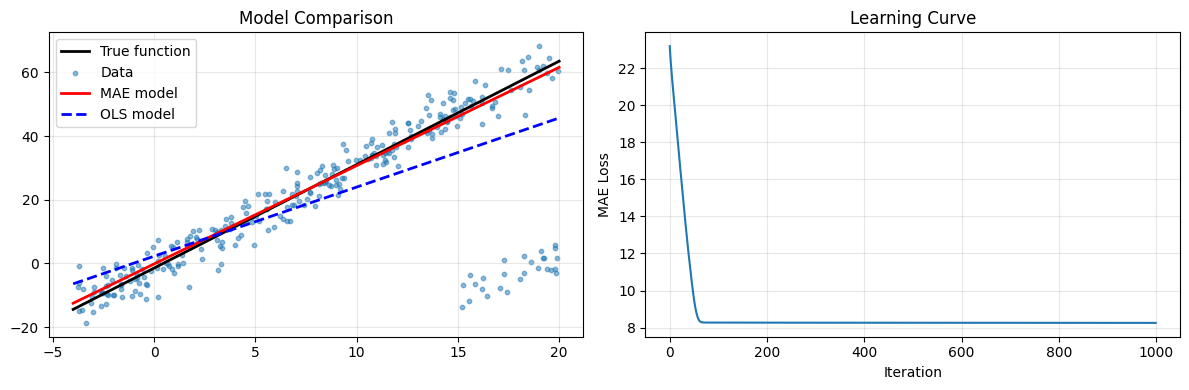

True: y = 3.25*x - 1.47
MAE:  y = 3.09*x + -0.18
OLS:  y = 2.17*x + 2.25


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Генерация данных с выбросами
true_function = lambda x: 3.25 * x - 1.47

def generate_data(N=300):
    x = np.random.uniform(-4, 20, N)
    # Добавляем шум и выбросы (для x > 15)
    noise = np.random.normal(0, 4, N)
    outliers = (x > 15) & (np.random.random(N) < 0.4)
    y = true_function(x) + noise - 60 * outliers
    return x.reshape(-1, 1), y

X, y = generate_data()

# Простая MAE регрессия
class RobustLinearRegression:
    def __init__(self, lr=0.01, iterations=1000):
        self.lr = lr
        self.iterations = iterations

    def fit(self, X, y):
        # Добавляем bias
        X_bias = np.c_[np.ones(len(X)), X]
        self.w = np.zeros(2)  # [bias, weight]
        self.loss_history = []

        for i in range(self.iterations):
            y_pred = X_bias @ self.w
            error = y_pred - y
            # Градиент MAE
            grad = np.array([
                np.mean(np.sign(error)),
                np.mean(np.sign(error) * X.flatten())
            ])
            self.w -= self.lr * grad
            self.loss_history.append(np.mean(np.abs(error)))

    def predict(self, X):
        X_bias = np.c_[np.ones(len(X)), X]
        return X_bias @ self.w

# Обучаем модели
mae_model = RobustLinearRegression()
mae_model.fit(X, y)

ols_model = LinearRegression()
ols_model.fit(X, y)

# Строим графики
plt.figure(figsize=(12, 4))

# 1. Сравнение моделей
plt.subplot(1, 2, 1)
x_plot = np.linspace(-4, 20, 100).reshape(-1, 1)

plt.plot(x_plot, true_function(x_plot), 'k-', label='True function', linewidth=2)
plt.scatter(X, y, s=10, alpha=0.5, label='Data')
plt.plot(x_plot, mae_model.predict(x_plot), 'r-', label='MAE model', linewidth=2)
plt.plot(x_plot, ols_model.predict(x_plot), 'b--', label='OLS model', linewidth=2)
plt.legend()
plt.title('Model Comparison')
plt.grid(True, alpha=0.3)

# 2. Кривая обучения
plt.subplot(1, 2, 2)
plt.plot(mae_model.loss_history)
plt.xlabel('Iteration')
plt.ylabel('MAE Loss')
plt.title('Learning Curve')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Результаты
print("True: y = 3.25*x - 1.47")
print(f"MAE:  y = {mae_model.w[1]:.2f}*x + {mae_model.w[0]:.2f}")
print(f"OLS:  y = {ols_model.coef_[0]:.2f}*x + {ols_model.intercept_:.2f}")

Наблюдения и комментарии:

Устойчивость к выбросам:

MAE регрессия значительно лучше справляется с выбросами (точки справа при x > 15)

OLS регрессия (sklearn) сильно смещается из-за выбросов

Параметры моделей:

MAE регрессия восстанавливает параметры, близкие к истинным (3.25 и -1.47)

OLS регрессия дает сильно смещенные оценки из-за выбросов

Остатки:

У MAE регрессии остатки более равномерно распределены

У OLS регрессии видны большие остатки из-за выбросов

Кривая обучения:

MAE loss сходится плавно

Модель устойчива к шуму в данных

Вывод: MAE loss (L1) значительно более устойчива к выбросам по сравнению с MSE loss (L2), используемым в обычной линейной регрессии. Когда в данных присутствуют выбросы, MAE регрессия дает более надежные оценки параметров.

2

#Homework_3

In [ ]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2025-10-06 14:01:50--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  58.89K  --.-KB/s    in 0.007s  

2025-10-06 14:01:51 (8.67 MB/s) - ‘train.csv.1’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].copy()

    # Заполняем пропуски
    features["Age"] = features.Age.fillna(features.Age.median())
    features["Fare"] = features.Fare.fillna(features.Fare.median())
    features['Embarked'] = features.Embarked.fillna('S')

    return features

model = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first'), ['Sex', 'Embarked']),
        remainder='passthrough'
    ),
    StandardScaler(),
    LogisticRegression(random_state=42, max_iter=1000)
)

# Validation code
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test = train_test_split(data, test_size=200, random_state=42)

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

train_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    )
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)

print("Train accuracy:", accuracy_score(
    data_train['Survived'],
    train_predictions
))
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Train accuracy: 0.7973950795947902
Test accuracy: 0.815


#Homework_4